# Classification of Antidepressant Drugs using the 1D-Convnet Model

This program is used to classify drugs into 5 classes including SSRIs (Selective Serotonin Reuptake Inhibitors) and Atypical Antipsychotics using the CNN derivative model, namely 1D-Convnet.

### IMPORT THE LIBRARY

In [1]:
import seaborn as sns 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scikitplot as skplt 
import wordcloud
import re 
import string 
import os 
import nltk 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score 
from keras import layers 
from keras import models 
from keras.callbacks import EarlyStopping  
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout, LeakyReLU 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from collections import Counter
from nltk.corpus import stopwords

### DATASET PREPARATION

In [2]:
# IMPORT DATASET

dataset = "C:\\Users\Gracia Rizka Pasfica\Documents\Github\Pyhton\Text\Antidepressant Drugs Classification\Dataset" 

In [3]:
# FOLDER IDENTIFICATION

# Saving folder
ssri_dataset = dataset + "/" + "ssri"
atipikal_dataset = dataset + "/" + "atypical" 

# Read and save file in folder
ssri_filenames = os.listdir(ssri_dataset) 
atipikal_filenames = os.listdir(atipikal_dataset) 

In [4]:
# READ FILES

def load_text(path): 
    file = open(path,"r")
    x_data = file.read() 
    file.close() 
    return x_data 

def load_data(path): 
    return load_text(path) 

In [5]:
# CREATE INDEPENDENT (x) and DEPENDENT (y) DATA

def get_data(folder_path, file_names, y_data): 
    x = list() 
    y = list() 
    for i in file_names:
        full_path = folder_path + "/" + i 
        x_data = load_data(path = full_path) 
        x.append(x_data) 
        y.append(y_data) 
    return x, y 

In [6]:
# INITIATION SSRI DATA

ssri_x, ssri_y = get_data(
    folder_path = ssri_dataset, 
    file_names = ssri_filenames,
    y_data = "SSRI (Selective Serotonin Reuptake Inhibitors)" 
) 

In [7]:
# INTITIATION ATYPICAL DATA

atipikal_x, atipikal_y = get_data(
    folder_path = atipikal_dataset, 
    file_names = atipikal_filenames, 
    y_data = "Atypical Antipsychotics" 
)

In [8]:
# COMBINED SSRI AND ATYPICAL DATA

x = ssri_x + atipikal_x 
y = ssri_y + atipikal_y 

In [9]:
print("SSRI Label     : ",len(ssri_x))
print("SSRI Target    : ",len(ssri_y))
print("Atypical Label : ",len(atipikal_x))
print("Atypical Target: ",len(atipikal_y))
print("Label Data     : ",len(x))
print("Target Data    : ",len(y))

SSRI Label     :  385
SSRI Target    :  385
Atypical Label :  383
Atypical Target:  383
Label Data     :  768
Target Data    :  768


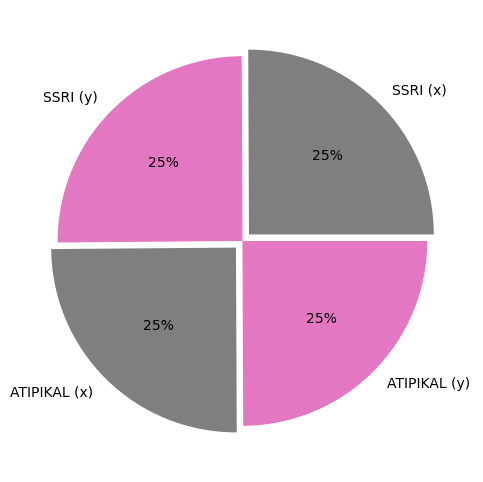

In [10]:
# DATA VISUALIZATION

total_ssriX = len(ssri_x) 
total_ssriY = len(ssri_y)
total_atipikalX = len(atipikal_x)
total_atipikalY = len(atipikal_y)

count = [total_ssriX, total_ssriY, total_atipikalX, total_atipikalY]
label = ['SSRI (x)', 'SSRI (y)', 'ATIPIKAL (x)', 'ATIPIKAL (y)']
color = sns.color_palette(['tab:grey', 'tab:pink', 'tab:grey', 'tab:pink'])[0:4]
explode = (0.05, 0, 0.05, 0)

plt.figure(figsize=(6,6))
plt.pie(count, labels = label, colors= color, autopct='%1.0f%%', explode = explode)

plt.show()

### DATASET PREPROCESSING

In [11]:
# Encoding Data Variabel y
le = LabelEncoder() 
le.fit(y) 
y = le.transform(y)

In [12]:
# CASE FOLDING

class LowerText:
    def process(self, text):
        return text.lower() 

In [13]:
# VECTORIZATION

class VectorizeText:
    def __init__(self):
        pass
    def process(self, text):
        return text.split()

In [14]:
# FILTER PUCNTUATION

class FilterPunctuation:
    def process(self, text):
        reg_exp = re.compile("[%s]"%re.escape(string.punctuation))
        text = [reg_exp.sub("", word) for word in text] 
        return text

In [15]:
# FILTER NON ALPHABET

class FilterNonAlpha:
    def process(self, text):
        text = [word for word in text if word.isalpha()] 
        return text

In [16]:
# TEXT PREPROCESSING

class TempProcess:
    def __init__(self, process_list):
        self.process_list = process_list 
    def process(self, text):
        for process in self.process_list:
            text = process.process(text) 
        return text

In [17]:
# TEXT PREPROCESSING

lowerText = LowerText()
vecText = VectorizeText()
filterPunct = FilterPunctuation()
filterNona = FilterNonAlpha()

TextPreprocessing = [lowerText,
                     vecText,
                     filterPunct,
                     filterNona
                    ]

TextPreprocessingResult = TempProcess(process_list = TextPreprocessing)

In [18]:
def process_text(texts, textProcess):
    process_texts=list()
    for text in texts:
        process_text = textProcess.process(text)
        process_texts.append(process_text)
    return process_texts

In [19]:
# TRAIN / TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 24)

print("Train / Test Split ...\n")
print("The length of the training data size (x) :",len(X_train))
print("The length of the training data size (y) :",len(y_train))
print("The length of the test data measure  (x) :",len(X_test))
print("The length of the test data measure  (y) :",len(y_test))

Train / Test Split ...

The length of the training data size (x) : 537
The length of the training data size (y) : 537
The length of the test data measure  (x) : 231
The length of the test data measure  (y) : 231


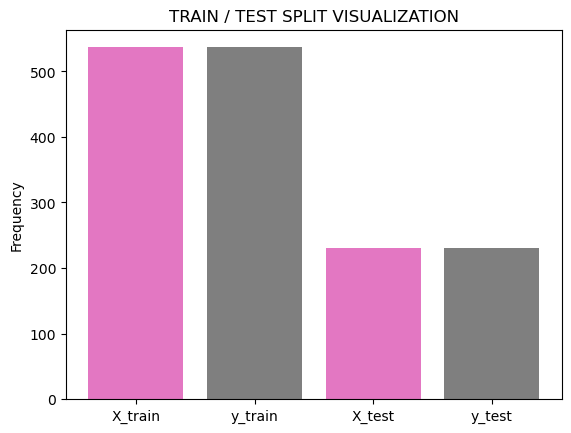

In [20]:
# DATA VISUALIZATION

total_xTrain = len(X_train)
total_yTrain = len(y_train)
total_xTest = len(X_test)
total_yTest = len(y_test)

fig, ax = plt.subplots() 

var_x = ['X_train', 'y_train', 'X_test', 'y_test']
counts = [total_xTrain, total_yTrain, total_xTest, total_yTest]
bar_colors = ['tab:pink', 'tab:grey', 'tab:pink', 'tab:grey']

ax.bar(var_x, counts, color = bar_colors)

ax.set_ylabel('Frequency')
ax.set_title('TRAIN / TEST SPLIT VISUALIZATION')

plt.show()

In [21]:
X_train_process = process_text(texts = X_train, textProcess = TextPreprocessingResult)
print("X_train processed...")

X_test_process = process_text(texts = X_test, textProcess = TextPreprocessingResult)
print("X_test processed...")

X_train processed...
X_test processed...


In [22]:
def tokenizer(texts):
    tokenizer = Tokenizer() 
    tokenizer.fit_on_texts(texts) 
    return tokenizer

In [23]:
def encode_text(tokenizer, max_lengths, texts):
    encoded = tokenizer.texts_to_sequences(texts)
    padded = pad_sequences(encoded, maxlen = max_length, padding = "post")
    return padded

In [24]:
tokenizer = tokenizer(texts = X_train) # melakukan proses tokenizer
vocab_size = len(tokenizer.word_index) + 1 # menghitung keseluruhan kata unik yang dijadikan tokenisasi
print("Vocabulary size:", vocab_size)

Vocabulary size: 274


In [25]:
max_length = max([len(row.split()) for row in X_train]) # menghitung ukuran data terpanjang
print("Maximum length:", max_length)

Maximum length: 60


In [26]:
X_train_encoded = encode_text(tokenizer, max_length, X_train_process) 
X_test_encoded = encode_text(tokenizer, max_length, X_test_process) 

### TRAINING MODELS

In [27]:
def create_model(vocab_size, max_length):
    model = models.Sequential()
    model.add(layers.Embedding(vocab_size, 100, input_length = max_length))
    model.add(layers.Conv1D(filters = 32,kernel_size = 8, activation = "relu"))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    return model

In [28]:
embedding_model = create_model(vocab_size=vocab_size, max_length=max_length)
embedding_model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 100)           27400     
                                                                 
 conv1d (Conv1D)             (None, 53, 32)            25632     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 26, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 832)               0         
                                                                 
 dense (Dense)               (None, 10)                8330      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                        

In [29]:
embedding_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
modelHistory = embedding_model.fit(X_train_encoded, 
                                   y_train, 
                                   batch_size = 16, 
                                   validation_data = (X_test_encoded, y_test),
                                   epochs = 10)

print("Model trained...")

Epoch 1/10
34/34 [==============================] - 3s 31ms/step - loss: 0.4509 - accuracy: 0.8529 - val_loss: 0.1471 - val_accuracy: 0.9827
Epoch 2/10
34/34 [==============================] - 1s 18ms/step - loss: 0.0398 - accuracy: 0.9981 - val_loss: 0.0413 - val_accuracy: 0.9870
Epoch 3/10
34/34 [==============================] - 1s 15ms/step - loss: 0.0082 - accuracy: 0.9981 - val_loss: 0.0226 - val_accuracy: 0.9870
Epoch 4/10
34/34 [==============================] - 1s 15ms/step - loss: 0.0080 - accuracy: 0.9981 - val_loss: 0.0086 - val_accuracy: 0.9957
Epoch 5/10
34/34 [==============================] - 1s 15ms/step - loss: 0.0031 - accuracy: 0.9981 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 6/10
34/34 [==============================] - 1s 15ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 0.9957
Epoch 7/10
34/34 [==============================] - 1s 15ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 8/10
34

### ACURACCY

In [31]:
_, acc = embedding_model.evaluate(X_train_encoded, y_train, verbose=0)
_,acc= embedding_model.evaluate(X_test_encoded, y_test, verbose=0)

In [32]:
print("Train accuracy:{:.2f}".format(acc*100))
print("Test accuracy:{:.2f}".format(acc*100))

Train accuracy:100.00
Test accuracy:100.00


In [33]:
target_classes = ["SSRI", "Atypical", "Tricyclic"]
predictY = embedding_model.predict(X_test_encoded, verbose=0)
print("Test Accuracy : {:.2f}".format(accuracy_score(y_test, predictY.round())*100),"%")

Test Accuracy : 100.00 %


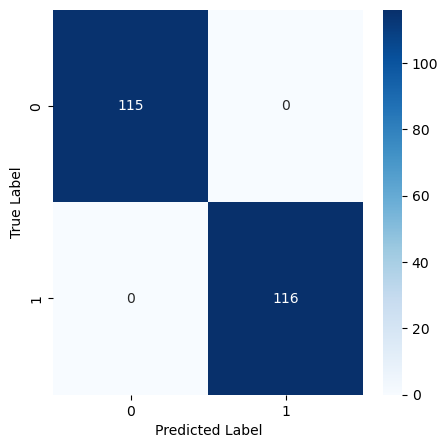

In [34]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(
    confusion_matrix(y_test, predictY.round()), 
    annot=True, 
    fmt=".0f", 
    ax=ax, 
    cmap="Blues"
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### MODEL VISUALIZATION 

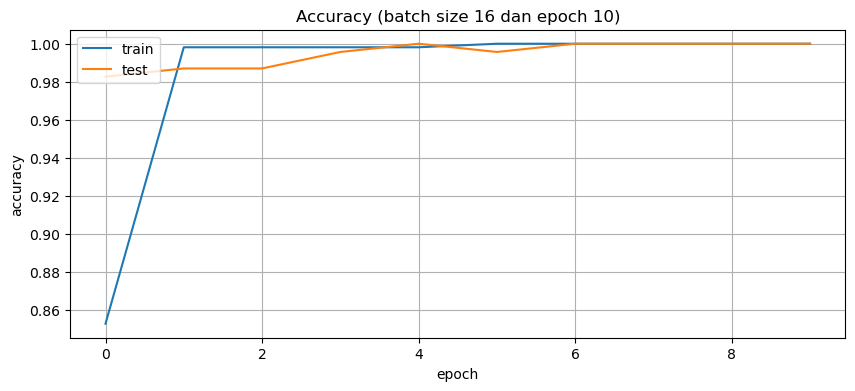

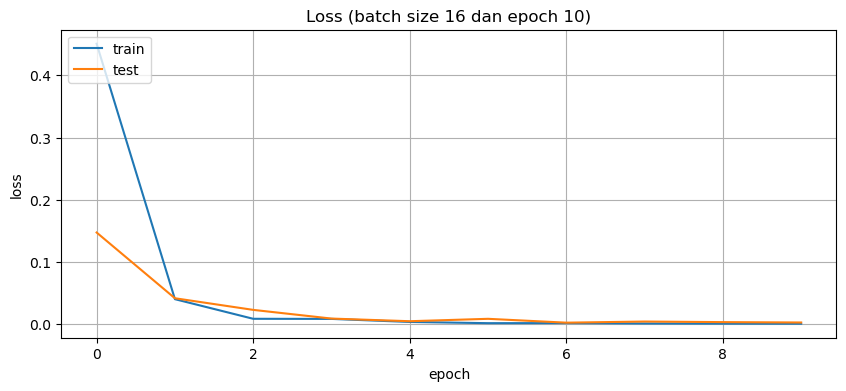

In [35]:
# Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(modelHistory.history['accuracy'])
plt.plot(modelHistory.history['val_accuracy'])
plt.title('Accuracy (batch size 16 dan epoch 10)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(modelHistory.history['loss'])
plt.plot(modelHistory.history['val_loss'])
plt.title('Loss (batch size 16 dan epoch 10)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

### CLASSIFICATION

In [36]:
preprocess = TextPreprocessingResult.process(X_test[70]) 
preprocess = [" ".join(preprocess)] 
res_preprocess = tokenizer.texts_to_sequences(preprocess) 
result = pad_sequences(res_preprocess, max_length, padding="post") 
res_predict = embedding_model.predict(result) 

def hasil(text):
    if res_predict.round() < 1:
        text = "Atypical Antipsychotics"
    else:
        text = "SSRI (Selective Serotonin Reuptake Inhibitors)"
    return text

1/1 [==============================] - 0s 40ms/step


In [37]:
print("="*24,"DATA BEFORE PREPROCESSING","="*24)
print("\n", X_test[70])
print("")
print("="*24,"DATA AFTER PREPROCESSING","="*24)
print("\n",result)
print("")
print("="*31,"RESULT","="*32)
print(res_predict.round(), " or ", hasil(res_predict))

======================== DATA BEFORE PREPROCESSING ========================

 Abilitat 30 mg Tablet ( Agitation , Irritability , Schizophrenia , Tourette's Disorder , Mayor Depressive Disorder , Bipolar 1 Disorder , Mixed Manic Depressive Episode , Psychosis , Psychotic Depression , Acute Manic Episode )

======================== DATA AFTER PREPROCESSING ========================

 [[188   2   6  25  74  10   1  12   3   1  11   1  17   9   3   4  27  75
   18   7   9   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]]

=============================== RESULT ================================
[[0.]]  or  Atypical Antipsychotics
